In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import important files
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [3]:
# Read and run csv file
df = pd.read_csv("/content/drive/MyDrive/CSE 303 PROJECT PRESENTATION/laptop_prices.csv")

In [4]:
# Print the head of data

df.head()


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8.0,macOS,1.37,1339.69,Standard,2560.0,...,Yes,Intel,2.3,Core i5,128.0,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8.0,macOS,1.34,898.94,Standard,1440.0,...,No,Intel,1.8,Core i5,128.0,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8.0,No OS,1.86,575.00,Full HD,1920.0,...,No,Intel,2.5,Core i5 7200U,NaN,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16.0,macOS,1.83,2537.45,Standard,2880.0,...,Yes,Intel,2.7,Core i7,NaN,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8.0,macOS,1.37,1803.60,Standard,2560.0,...,Yes,Intel,3.1,Core i5,256.0,0,SSD,No,Intel,Iris Plus Graphics 650


In [5]:
# Print the tail of data
df.tail()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4.0,Windows 10,1.80,638.0,Full HD,1920.0,...,No,Intel,2.5,Core i7 6500U,128.0,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16.0,Windows 10,1.30,1499.0,Quad HD+,3200.0,...,No,Intel,2.5,Core i7 6500U,512.0,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2.0,Windows 10,1.50,229.0,Standard,1366.0,...,No,Intel,1.6,Celeron Dual Core N3050,64.0,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6.0,Windows 10,2.19,764.0,Standard,1366.0,...,No,Intel,2.5,Core i7 6500U,1024.0,0,HDD,No,AMD,Radeon R5 M330
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,4.0,Windows 10,2.20,369.0,Standard,1366.0,...,No,Intel,1.6,Celeron Dual Core N3050,500.0,0,HDD,No,Intel,HD Graphics


In [ ]:
# Check the null values
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,87
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,129


<Axes: >

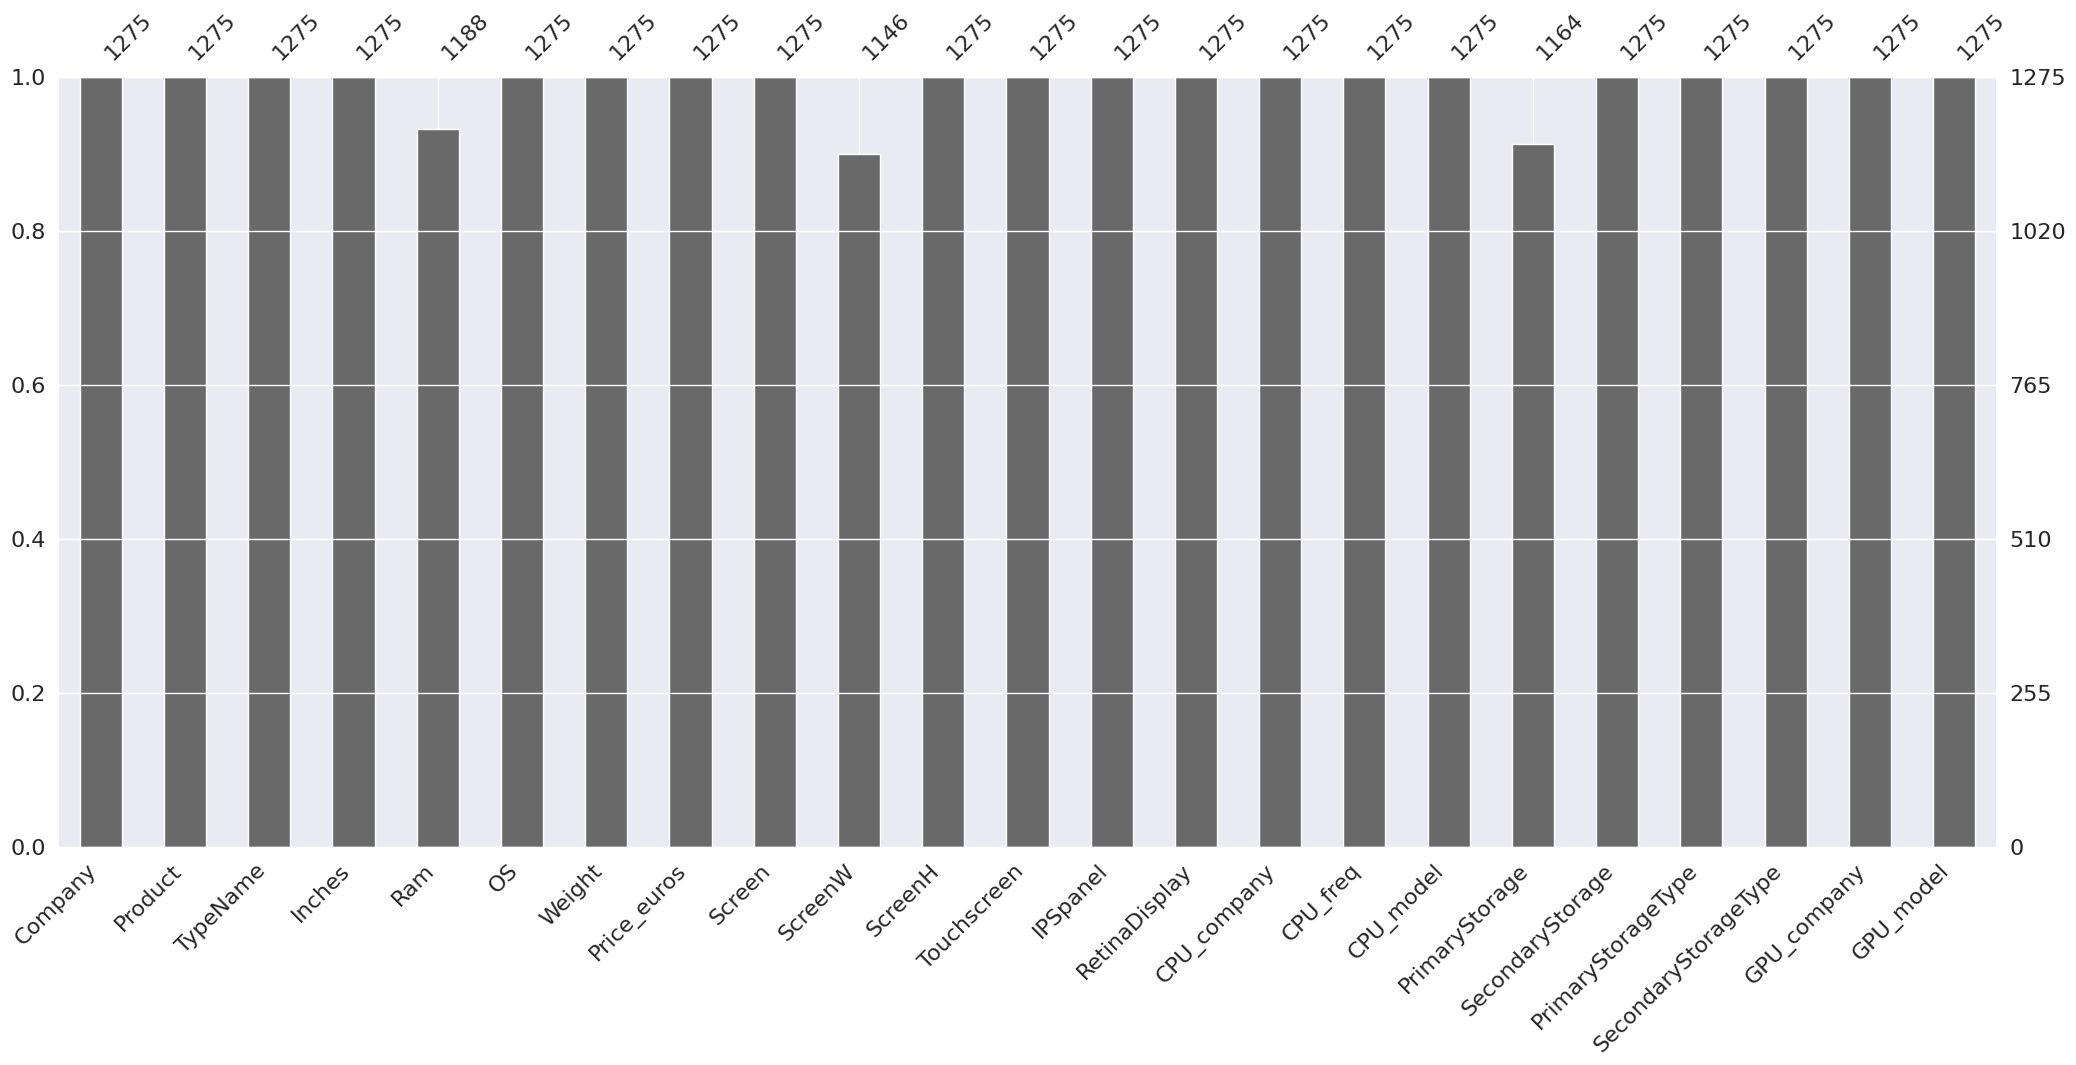

In [ ]:
# Finding missing values in barplot
import missingno as msno
msno.bar(df)

In [ ]:
# Check for duplicate data
duplicate = df[df.duplicated()]
duplicate

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model


In [ ]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               0 non-null      object 
 1   Product               0 non-null      object 
 2   TypeName              0 non-null      object 
 3   Inches                0 non-null      float64
 4   Ram                   0 non-null      float64
 5   OS                    0 non-null      object 
 6   Weight                0 non-null      float64
 7   Price_euros           0 non-null      float64
 8   Screen                0 non-null      object 
 9   ScreenW               0 non-null      float64
 10  ScreenH               0 non-null      int64  
 11  Touchscreen           0 non-null      object 
 12  IPSpanel              0 non-null      object 
 13  RetinaDisplay         0 non-null      object 
 14  CPU_company           0 non-null      object 
 15  CPU_freq              0 non-null      fl

In [ ]:
# Finding outlier for Ram

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['Ram'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 198
max outlier value: 64.0
min outlier value: 16.0


In [ ]:
# Apply median for Ram
med_val = df['Ram'].median()

df['Ram'] = df['Ram'].fillna(med_val)
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,129


In [ ]:
# Finding outlier for ScreenW

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['ScreenW'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 92
max outlier value: 3840.0
min outlier value: 2560.0


In [ ]:
# Apply median for ScreenW
med_val = df['ScreenW'].median()

df['ScreenW'] = df['ScreenW'].fillna(med_val)
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [ ]:
# Finding outlier for PrimaryStorage

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['PrimaryStorage'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 226
max outlier value: 2048.0
min outlier value: 1024.0


In [ ]:
# Apply median for PrimaryStorage
med_val = df['PrimaryStorage'].median()

df['PrimaryStorage'] = df['PrimaryStorage'].fillna(med_val)
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [ ]:
# Employee data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   float64
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   float64
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [ ]:
# Copy the data
df_c = df.copy()

In [ ]:
# Find the Unique data of Company
find = df_c['Company'].unique()
print(find.size)
print(find)

19
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


In [ ]:
#  Create a mapping dictionary for Company
company_mapping = {'Apple': 0, 'HP': 1 , 'Acer':2, 'Asus':3, 'Dell':4, 'Lenovo':5, 'Chuwi':6, 'MSI':7, 'Microsoft':8, 'Toshiba':9, 'Huawei':10, 'Xiomi':11, 'Vero':12, 'Razer':13, 'Mediacom':14, 'Samsung':15, 'Google':16, 'Fujitsu':17, 'LG':18}
df_c['Company'] = df_c['Company'].map(company_mapping)

In [ ]:
# Find the Unique data of TypeName
find = df_c['TypeName'].unique()
print(find.size)
print(find)

6
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']


In [ ]:
#  Create a mapping dictionary for TypeName
typename_mapping = {'Ultrabook': 0, 'Notebook': 1 , 'Netbook':2, 'Gaming':3, '2 in 1 Convertible':4, 'Workstation':5}
df_c['TypeName'] = df_c['TypeName'].map(typename_mapping)

In [ ]:
# Find the Unique data of OS
find = df_c['OS'].unique()
print(find.size)
print(find)

9
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [ ]:
#  Create a mapping dictionary for OS
os_mapping = {'macOS': 0, 'No OS': 1 , 'Windows 10':2, 'Mac OS X':3, 'Linux':4, 'Android':5, 'Windows 10 S':6, 'Chrome OS':7, 'Windows 7':8}
df_c['OS'] = df_c['OS'].map(os_mapping)

In [ ]:
# Find the Unique data of Screen
find = df_c['Screen'].unique()
print(find.size)
print(find)

4
['Standard' 'Full HD' 'Quad HD+' '4K Ultra HD']


In [ ]:
#  Create a mapping dictionary for Screen
screen_mapping = {'Standard': 0, 'Full H': 1 , 'Quad HD+':2, '4K Ultra HD':3}
df_c['Screen'] = df_c['Screen'].map(screen_mapping)

In [ ]:
# Find the Unique data of Touchscreen
find = df_c['Touchscreen'].unique()
print(find.size)
print(find)

2
['No' 'Yes']


In [ ]:
#  Create a mapping dictionary for Touchscreen
touchscreen_mapping = {'No': 0, 'Yes': 1}
df_c['Touchscreen'] = df_c['Touchscreen'].map(touchscreen_mapping)

In [ ]:
# Find the Unique data of IPSpanel
find = df_c['IPSpanel'].unique()
print(find.size)
print(find)

2
['Yes' 'No']


In [ ]:
#  Create a mapping dictionary for IPSpanel
ipspan_mapping = {'Yes': 0, 'No': 1}
df_c['IPSpanel'] = df_c['IPSpanel'].map(ipspan_mapping)

In [ ]:
# Find the Unique data of RetinaDisplay
find = df_c['RetinaDisplay'].unique()
print(find.size)
print(find)

2
['Yes' 'No']


In [ ]:
#  Create a mapping dictionary for RetinaDisplay
ratina_mapping = {'Yes': 0, 'No': 1}
df_c['RetinaDisplay'] = df_c['RetinaDisplay'].map(ratina_mapping)

In [ ]:
# Find the Unique data of  CPU_company
find = df_c['CPU_company'].unique()
print(find.size)
print(find)

3
['Intel' 'AMD' 'Samsung']


In [ ]:
#  Create a mapping dictionary for CPU_company
cpucom_mapping = {'Intel': 0, 'Amd': 1, 'Samsung':2}
df_c['CPU_company'] = df_c['CPU_company'].map(cpucom_mapping)

In [ ]:
# Find the Unique data of PrimaryStorageType
find = df_c['PrimaryStorageType'].unique()
print(find.size)
print(find)

4
['SSD' 'Flash Storage' 'HDD' 'Hybrid']


In [ ]:
#  Create a mapping dictionary for PrimaryStorageType
pstorage_mapping = {'SSD': 0, 'Flash Storage': 1, 'HDD':2, 'Hybrid':3}
df_c['PrimaryStorageType'] = df_c['PrimaryStorageType'].map(pstorage_mapping)

In [ ]:
# Find the Unique data of SecondaryStorageType
find = df_c['SecondaryStorageType'].unique()
print(find.size)
print(find)

4
['No' 'HDD' 'SSD' 'Hybrid']


In [ ]:
#  Create a mapping dictionary for SecondaryStorageType
sstorage_mapping = {'No': 0, 'HDD': 1, 'SDD':2, 'Hybrid':3}
df_c['SecondaryStorageType'] = df_c['SecondaryStorageType'].map(sstorage_mapping)

In [ ]:
# Find the Unique data of GPU_company
find = df_c['GPU_company'].unique()
print(find.size)
print(find)

4
['Intel' 'AMD' 'Nvidia' 'ARM']


In [ ]:
#  Create a mapping dictionary for GPU_company
gpumodel_mapping = {'Intel': 0, 'AMD': 1, 'Nvidia':2, 'ARM':3}
df_c['GPU_company'] = df_c['GPU_company'].map(gpumodel_mapping)

In [ ]:
# Check data types
print(df_c.dtypes)

Company                 float64
Product                  object
TypeName                  int64
Inches                  float64
Ram                     float64
OS                        int64
Weight                  float64
Price_euros             float64
Screen                  float64
ScreenW                 float64
ScreenH                   int64
Touchscreen               int64
IPSpanel                  int64
RetinaDisplay             int64
CPU_company             float64
CPU_freq                float64
CPU_model                object
PrimaryStorage          float64
SecondaryStorage          int64
PrimaryStorageType        int64
SecondaryStorageType    float64
GPU_company               int64
GPU_model                object
dtype: object


In [ ]:
# Drop Product, GPU Model and CPU Modle column because of large number of uniqe values

df_c.drop(columns=['Product','CPU_model','GPU_model'],inplace=True)


In [ ]:
# Check data types after remove all the object type
print(df_c.dtypes)

Company                 float64
TypeName                  int64
Inches                  float64
Ram                     float64
OS                        int64
Weight                  float64
Price_euros             float64
Screen                  float64
ScreenW                 float64
ScreenH                   int64
Touchscreen               int64
IPSpanel                  int64
RetinaDisplay             int64
CPU_company             float64
CPU_freq                float64
PrimaryStorage          float64
SecondaryStorage          int64
PrimaryStorageType        int64
SecondaryStorageType    float64
GPU_company               int64
dtype: object


In [ ]:
# Find the Unique data of Price_euros
find = df_c['Price_euros'].unique()
print(find.size)
print(find)

791
[1339.69  898.94  575.   2537.45 1803.6   400.   2139.97 1158.7  1495.
  770.    393.9   344.99 2439.97  498.9  1262.4  1518.55  745.   2858.
  499.    979.    191.9   999.    258.    819.    659.    418.64 1099.
  800.   1298.    896.    244.99  199.    439.   1869.    998.    249.
  367.    488.69  879.    389.   1499.    522.99  682.   1419.    369.
 1299.    639.    466.    319.    841.    398.49 1103.    384.    767.8
  586.19 2449.    415.    599.    941.    690.   1983.    438.69  229.
  549.    949.   1089.    955.    870.   1095.    519.    855.    530.
  977.   1096.16 1510.    860.    399.    395.   1349.    699.    598.99
 1449.   1649.    689.   1197.   1195.   1049.    847.    599.9   485.
  577.   1249.    719.    349.    647.   1119.   1340.    414.9  1193.
 1480.   1262.   1379.   1399.    722.   1629.   1398.99 1084.   1130.33
  564.   1118.    479.   2241.5   629.   1271.    451.    259.    812.
  277.99 1396.    928.    638.99  449.    884.    572.    598.    98

In [ ]:
# Write down the minimum and maximum number of Price_euros

print("Minimum Price_euros:", df_c['Price_euros'].min())
print("Maximum Price_euros:", df_c['Price_euros'].max())


Minimum Price_euros: 174.0
Maximum Price_euros: 6099.0


In [ ]:
# Mapping the Price_euros column into two variables Low and High

def map_price(price):
  if price <= df_c['Price_euros'].median():
    return 'Low'
  else:
    return 'High'

# Apply the mapping function to the Price_euros column and create a new column
df_c['Price_Category'] = df_c['Price_euros'].apply(map_price)
print(df_c.head())


   Company  TypeName  Inches   Ram  OS  Weight  Price_euros  Screen  ScreenW  \
0      0.0         0    13.3   8.0   0    1.37      1339.69     0.0   2560.0   
1      0.0         0    13.3   8.0   0    1.34       898.94     0.0   1440.0   
2      1.0         1    15.6   8.0   1    1.86       575.00     NaN   1920.0   
3      0.0         0    15.4  16.0   0    1.83      2537.45     0.0   2880.0   
4      0.0         0    13.3   8.0   0    1.37      1803.60     0.0   2560.0   

   ScreenH  ...  IPSpanel  RetinaDisplay  CPU_company  CPU_freq  \
0     1600  ...         0              0          0.0       2.3   
1      900  ...         1              1          0.0       1.8   
2     1080  ...         1              1          0.0       2.5   
3     1800  ...         0              0          0.0       2.7   
4     1600  ...         0              0          0.0       3.1   

   PrimaryStorage  SecondaryStorage  PrimaryStorageType  SecondaryStorageType  \
0           128.0                 0

In [ ]:
# Find the Unique data of Price_Category
find = df_c['Price_Category'].unique()
print(find.size)
print(find)

2
['High' 'Low']


In [ ]:
# Create a mapping dictionary for Price_Category
pricecatagory_mapping = {'High': 0, 'Low': 1}
df_c['Price_Category'] = df_c['Price_Category'].map(pricecatagory_mapping)

In [ ]:
# Check the null values
df_c.isnull().sum()

,0
Company,4
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,835
ScreenW,0
ScreenH,0


In [ ]:
# Finding outlier for Company

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df_c['Company'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 38
max outlier value: 18.0
min outlier value: 10.0


In [ ]:
# Apply median for Company
med_val = df_c['Company'].median()

df_c['Company'] = df_c['Company'].fillna(med_val)
df_c.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,835
ScreenW,0
ScreenH,0


In [ ]:
# Finding outlier for CPU_company

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df_c['CPU_company'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 1
max outlier value: 2.0
min outlier value: 2.0


In [ ]:
# Apply median for CPU_company
med_val = df_c['CPU_company'].median()

df_c['CPU_company'] = df_c['CPU_company'].fillna(med_val)
df_c.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,835
ScreenW,0
ScreenH,0


In [ ]:
# Finding outlier for Screen

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df_c['Screen'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 71
max outlier value: 3.0
min outlier value: 2.0


In [ ]:
# Apply median for Screen
med_val = df_c['CPU_company'].median()

df_c['Screen'] = df_c['Screen'].fillna(med_val)
df_c.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0
ScreenH,0


In [ ]:
# Finding outlier for SecondaryStorageType

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df_c['SecondaryStorageType'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 204
max outlier value: 3.0
min outlier value: 1.0


In [ ]:
# Apply median for Screen SecondaryStorageType
med_val = df_c['SecondaryStorageType'].median()

df_c['SecondaryStorageType'] = df_c['SecondaryStorageType'].fillna(med_val)
df_c.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0
ScreenH,0


In [ ]:
# Laptop Prices correlation
correlation = df_c.corr()
correlation

,Company,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,...,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,Price_Category
Company,1.000000,0.016444,-0.055786,0.150258,-0.005049,-0.056165,0.147017,0.036464,0.084904,0.085929,...,-0.051502,0.150370,0.113425,0.052992,-0.105352,0.077003,-0.145333,0.074791,0.022361,-0.124004
TypeName,0.016444,1.000000,0.150625,0.254647,0.006710,0.330522,0.291660,0.067842,0.113638,0.111700,...,-0.173432,0.133419,0.052619,0.171945,-0.069994,0.302684,-0.124900,0.316554,0.337861,-0.216037
Inches,-0.055786,0.150625,1.000000,0.224300,-0.186585,0.826638,0.066608,-0.070207,-0.074214,-0.093062,...,0.110116,0.142079,-0.053388,0.305037,0.239425,0.389067,0.175539,0.406531,0.576768,0.075794
Ram,0.150258,0.254647,0.224300,1.000000,-0.089532,0.361558,0.715704,0.267004,0.406823,0.402257,...,-0.202896,-0.033732,-0.024593,0.355051,0.016429,0.371432,-0.355500,0.382214,0.376444,-0.510051
OS,-0.005049,0.006710,-0.186585,-0.089532,1.000000,-0.117962,0.025558,-0.017006,-0.045086,-0.037029,...,0.102320,0.111262,0.090405,-0.103027,-0.100130,-0.104619,0.010265,-0.108078,-0.111934,-0.024537
Weight,-0.056165,0.330522,0.826638,0.361558,-0.117962,1.000000,0.211883,-0.034888,-0.032019,-0.050106,...,-0.022129,0.122862,-0.037297,0.318649,0.161813,0.481495,0.100906,0.534999,0.620372,-0.017548
Price_euros,0.147017,0.291660,0.066608,0.715704,0.025558,0.211883,1.000000,0.355801,0.519631,0.548529,...,-0.250737,-0.086775,-0.019037,0.428847,-0.109783,0.291207,-0.479130,0.314209,0.277716,-0.747774
Screen,0.036464,0.067842,-0.070207,0.267004,-0.017006,-0.034888,0.355801,1.000000,0.807928,0.811207,...,-0.118264,0.027718,-0.006680,0.039278,0.014251,0.060913,-0.163873,0.039877,0.047881,-0.234218
ScreenW,0.084904,0.113638,-0.074214,0.406823,-0.045086,-0.032019,0.519631,0.807928,1.000000,0.950088,...,-0.263410,-0.109511,0.029684,0.158601,-0.072810,0.145521,-0.366882,0.128644,0.139780,-0.418447
ScreenH,0.085929,0.111700,-0.093062,0.402257,-0.037029,-0.050106,0.548529,0.811207,0.950088,1.000000,...,-0.280009,-0.217058,0.051941,0.164369,-0.074054,0.135293,-0.367273,0.119869,0.143145,-0.441731


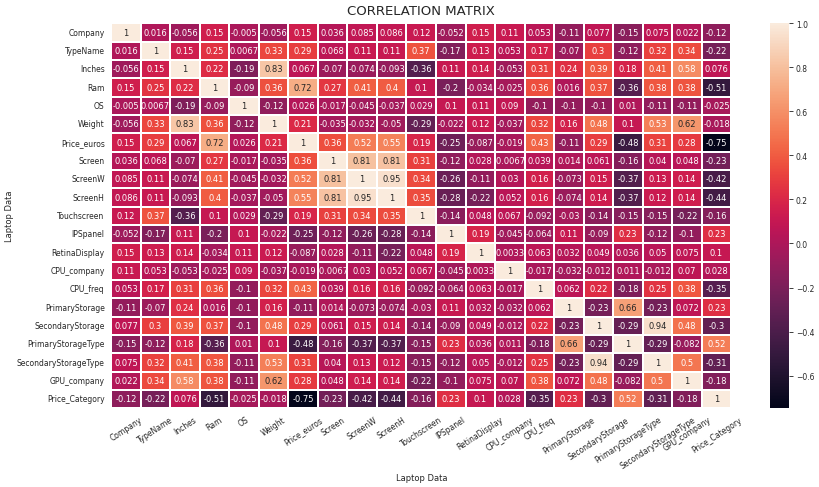

In [ ]:
# Visualisation of the corralation table of Laptop Prices

plt.figure(figsize=(20,10), dpi=50)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Laptop Data')
plt.ylabel('Laptop Data')
plt.xticks(rotation=33)
plt.show()

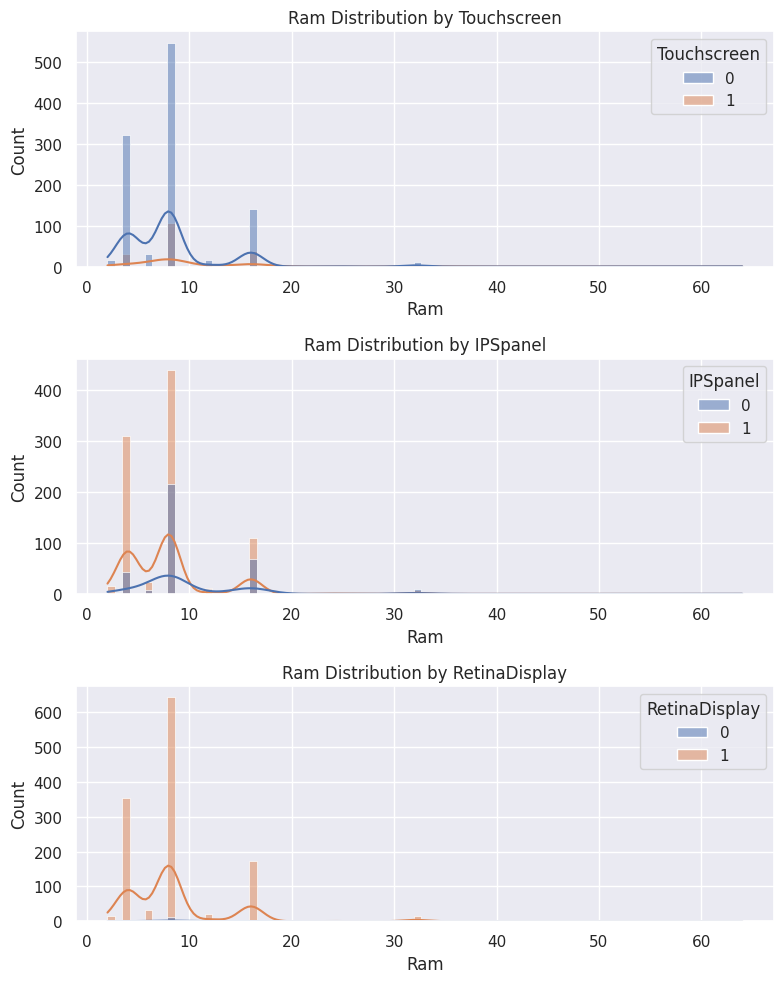

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histplot of gender, smoking_history, and diabetes (categorical columns)
plt.figure(figsize=(8, 10))

# Plot for gender
plt.subplot(3, 1, 1)
sns.histplot(df_c, x='Ram', hue='Touchscreen', kde=True)  # Replace 'data' with 'df_c'
plt.title('Ram Distribution by Touchscreen')  # Update title accordingly

# Plot for smoking_history
plt.subplot(3, 1, 2)
sns.histplot(df_c, x='Ram', hue='IPSpanel', kde=True)  # Replace 'data' with 'df_c'
plt.title('Ram Distribution by IPSpanel')  # Update title accordingly

# Plot for diabetes status
plt.subplot(3, 1, 3)
sns.histplot(df_c, x='Ram', hue='RetinaDisplay', kde=True)  # Replace 'data' with 'df_c'
plt.title('Ram Distribution by RetinaDisplay')  # Update title accordingly

# Show plots
plt.tight_layout()
plt.show()

<ipython-input-144-fc266bb382ec>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Touchscreen', y='Price_euros', data=df_c, palette=['lightblue', 'lightgreen'])


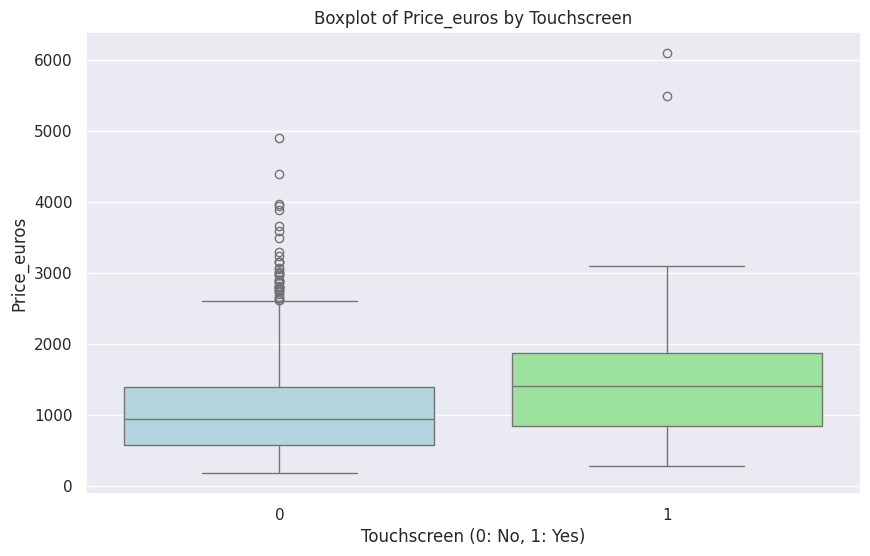

<ipython-input-144-fc266bb382ec>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IPSpanel', y='Price_euros', data=df_c, palette=['lightcoral', 'lightskyblue'])


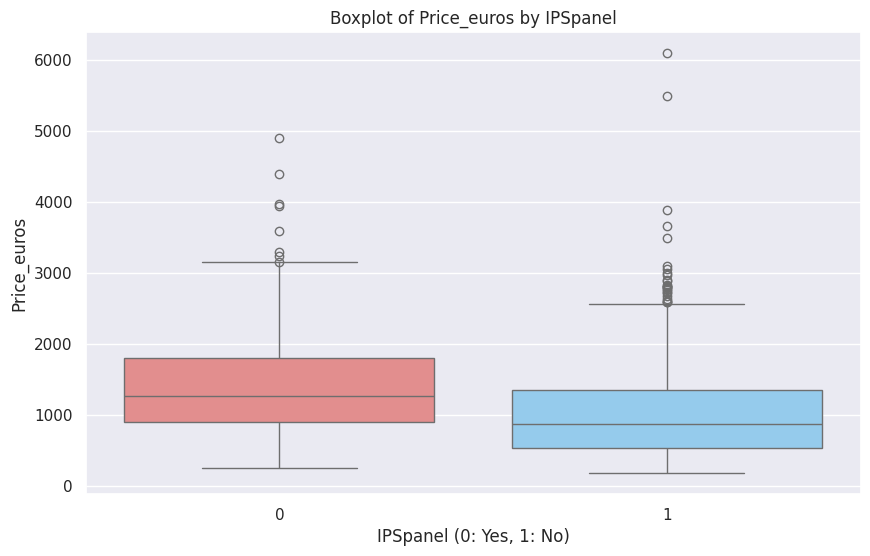

In [ ]:
# Boxplot code of Touchscreen

plt.figure(figsize=(10, 6))
sns.boxplot(x='Touchscreen', y='Price_euros', data=df_c, palette=['lightblue', 'lightgreen'])
plt.title('Boxplot of Price_euros by Touchscreen')
plt.xlabel('Touchscreen (0: No, 1: Yes)')
plt.ylabel('Price_euros')
plt.show()

# Boxplot code of IPSpanel
plt.figure(figsize=(10, 6))
sns.boxplot(x='IPSpanel', y='Price_euros', data=df_c, palette=['lightcoral', 'lightskyblue'])
plt.title('Boxplot of Price_euros by IPSpanel')
plt.xlabel('IPSpanel (0: Yes, 1: No)')
plt.ylabel('Price_euros')
plt.show()


The boxplot shows the distribution of laptop prices based on whether they have a touchscreen or not. The horizontal line inside the box represents the median price for each Touchscreen category. The box itself represents the interquartile range (IQR), which contains the middle 50% of the data. The IQR for laptops with touchscreens is slightly wider than the IQR for laptops without touchscreens. The lines extending from the box (whiskers) represent the range of the data, excluding outliers.

The boxplot shows the distribution of laptop prices based on whether they have an IPS panel or not. The horizontal line inside the box represents the median price for each IPSpanel category. The box itself represents the interquartile range (IQR), which contains the middle 50% of the data. The IQR for laptops with IPS panels is slightly wider than the IQR for laptops without IPS panels. The lines extending from the box (whiskers) represent the range of the data, excluding outliers.

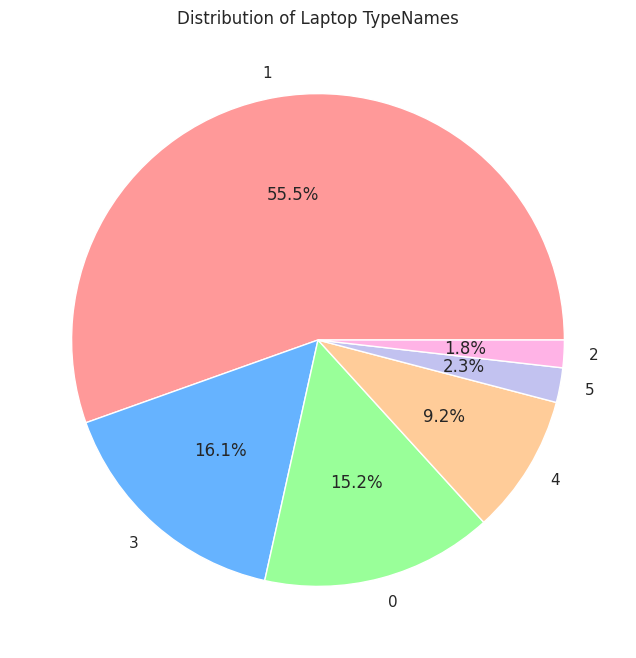

In [ ]:
# pie chart of Laptop TypeNames

typename_counts = df_c['TypeName'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(typename_counts, labels=typename_counts.index, autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title('Distribution of Laptop TypeNames')
plt.show()


The pie chart visualizes the distribution of laptop TypeNames within the dataset where Ultrabook: 0, Notebook: 1 , Netbook:2, Gaming:3, 2 in 1 Convertible:4, Workstation:5. Each slice represents a different TypeName, and the size of the slice is proportional to the number of laptops belonging to that type. Notebooks are the most prevalent type, comprising the largest portion of the dataset. Ultrabooks represent the second-largest category.

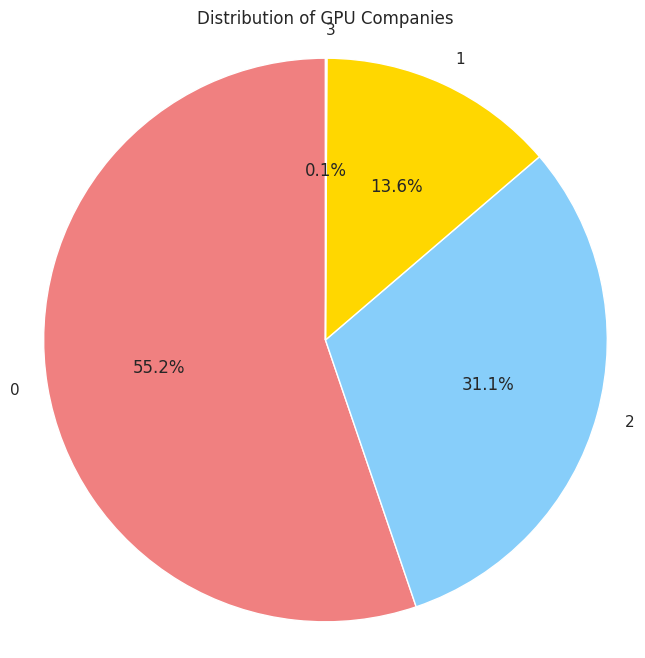

In [ ]:
# Pie chart code of GPU_Company

import matplotlib.pyplot as plt
gpu_company_counts = df_c['GPU_company'].value_counts()

colors = ['lightcoral', 'lightskyblue', 'gold', 'lightgreen']
plt.figure(figsize=(8, 8))
plt.pie(gpu_company_counts, labels=gpu_company_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of GPU Companies')
plt.axis('equal')
plt.show()


The pie chart displays the distribution of laptop GPU companies within the dataset Where Intel: 0, AMD: 1, Nvidia:2, ARM:3. Each slice of the pie represents a different GPU company, and its size is proportional to the number of laptops using GPUs from that company.  Nvidia GPUs are the most common in the laptops in the dataset, constituting the largest portion of the pie. Intel GPUs are the second most frequent, making up a substantial portion of the laptops. AMD GPUs are present in a moderate number of laptops within the dataset. ARM GPUs are the least common in the laptops

<ipython-input-147-f411eaa292b4>:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x='PrimaryStorage', hue='Price_Category', data=df_c, color='skyblue')


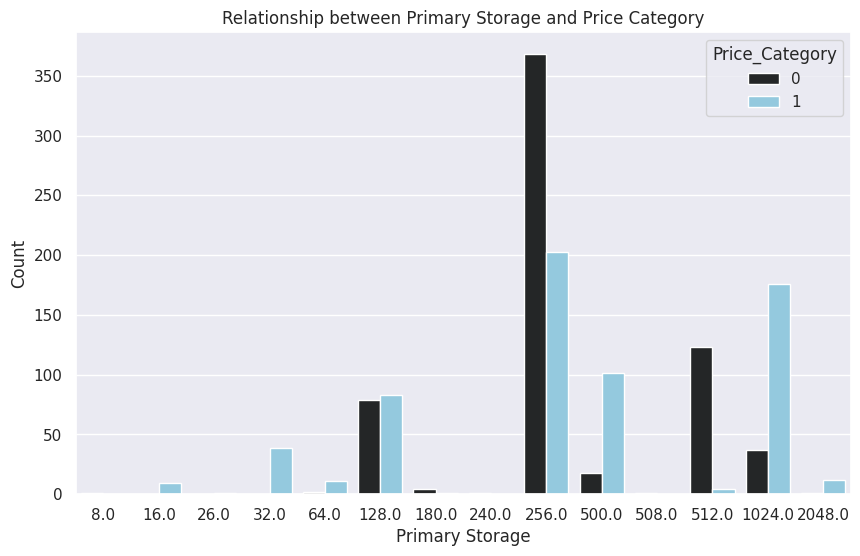

In [ ]:
# Count plot between Primary Storage and Price Catagory

plt.figure(figsize=(10, 6))
sns.countplot(x='PrimaryStorage', hue='Price_Category', data=df_c, color='skyblue')
plt.title('Relationship between Primary Storage and Price Category')
plt.xlabel('Primary Storage')
plt.ylabel('Count')
plt.show()


The count plot visualizes the distribution of the type of primary storage and the price category of the laptops. It shows the number of laptops with different types of primary storage (e.g., SSD, HDD). It also indicates the proportion of these laptops with either a high or low price.


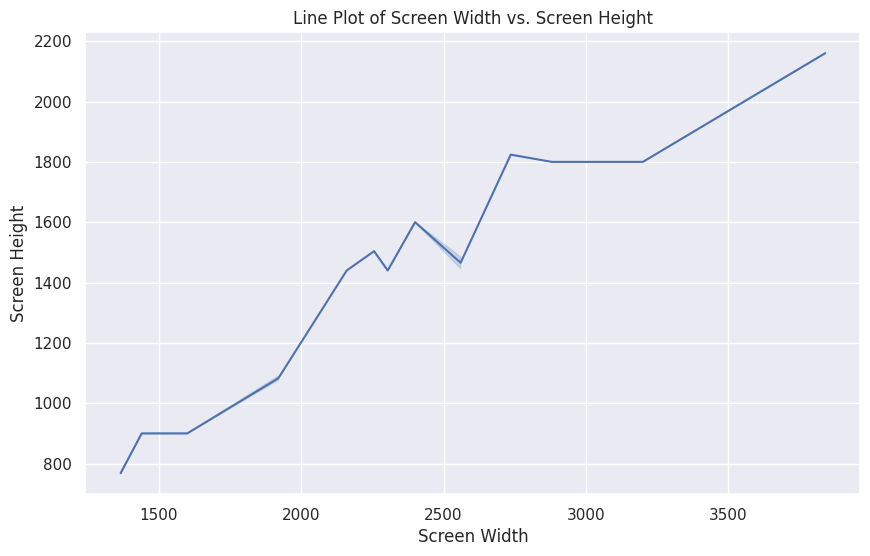

In [ ]:
# Lineplot of ScreenW and ScreenH

plt.figure(figsize=(10, 6))
sns.lineplot(x='ScreenW', y='ScreenH', data=df_c)
plt.title('Line Plot of Screen Width vs. Screen Height')
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.show()


The line plot visualizes the relationship between screen width and screen height in the laptop dataset. It shows the general trend of how screen height changes with screen width. This indicates that laptops with wider screens tend to have greater screen heights.


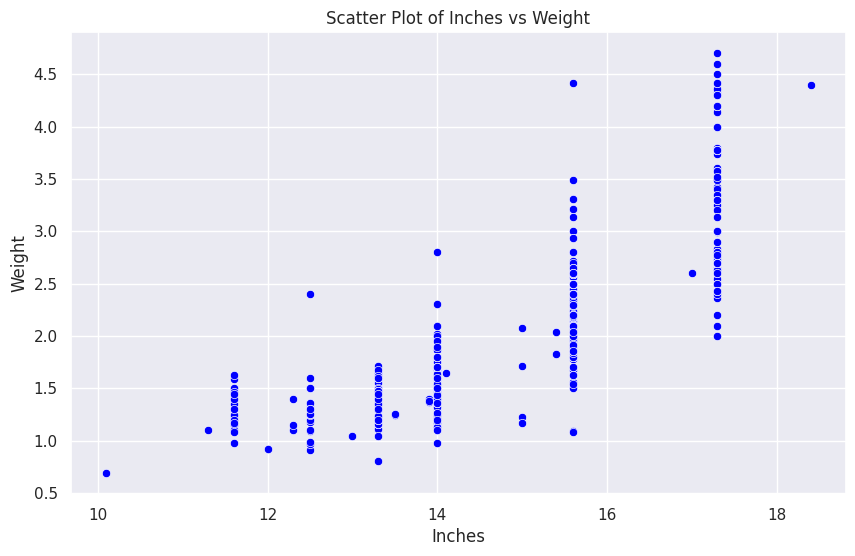

In [ ]:
# Scatter plot of Inches vs Weight

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inches', y='Weight', data=df_c, color= 'Blue')
plt.title('Scatter Plot of Inches vs Weight')
plt.xlabel('Inches')
plt.ylabel('Weight')
plt.show()


The scatter plot visualizes the relationship between screen size (Inches) and laptop weight. It is show that the screen size increases, the laptop weight also tends to increase. This indicates that larger laptops generally weight more.

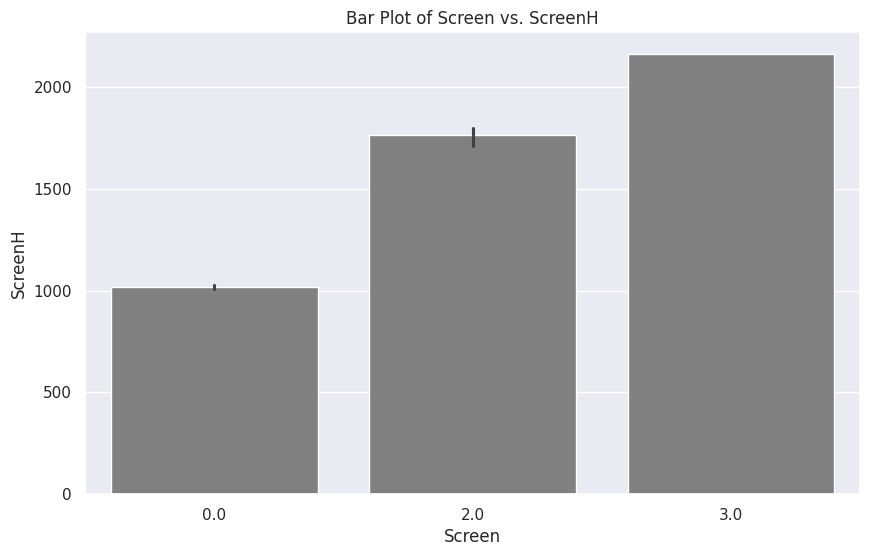

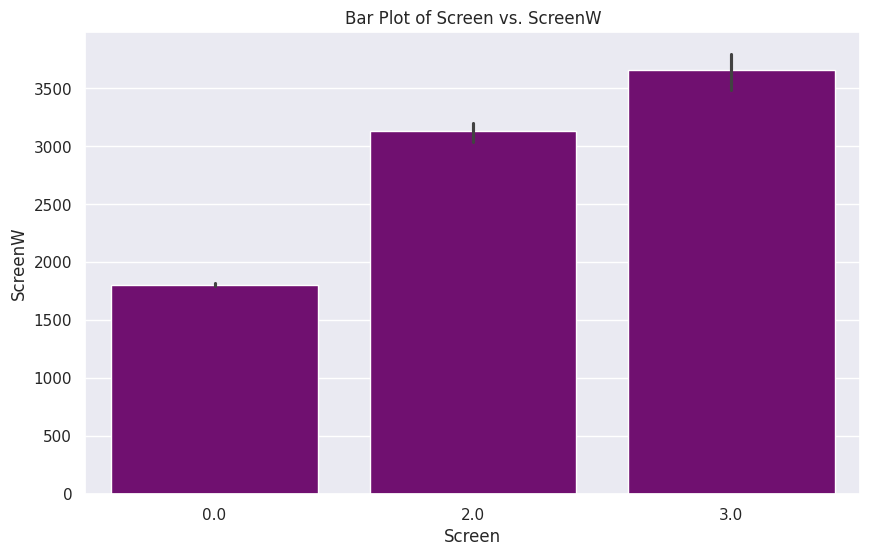

In [ ]:
# Barplot of Screen column and ScreenH column

plt.figure(figsize=(10, 6))
sns.barplot(x='Screen', y='ScreenH', data=df_c,color='Grey')
plt.title('Bar Plot of Screen vs. ScreenH')
plt.xlabel('Screen')
plt.ylabel('ScreenH')
plt.show()

# Barplot of Screen column and ScreenW column

plt.figure(figsize=(10, 6))
sns.barplot(x='Screen', y='ScreenW', data=df_c,color= 'Purple')
plt.title('Bar Plot of Screen vs. ScreenW')
plt.xlabel('Screen')
plt.ylabel('ScreenW')
plt.show()


The bar plot visualizes the average screen height (ScreenH) for different screen types. There screen generally has a higher or lower screen height. The x-axis represents different categories of screen displays (e.g., Standard, Full HD) while the y-axis represents the average screen height for each screen type.

The bar plot visualizes the average screen width (ScreenW) for different screen types.There screen generally has a higher or lower screen width. The x-axis represents different categories of screen displays (e.g., Standard, Full HD) while the y-axis represents the average screen width for each screen type.

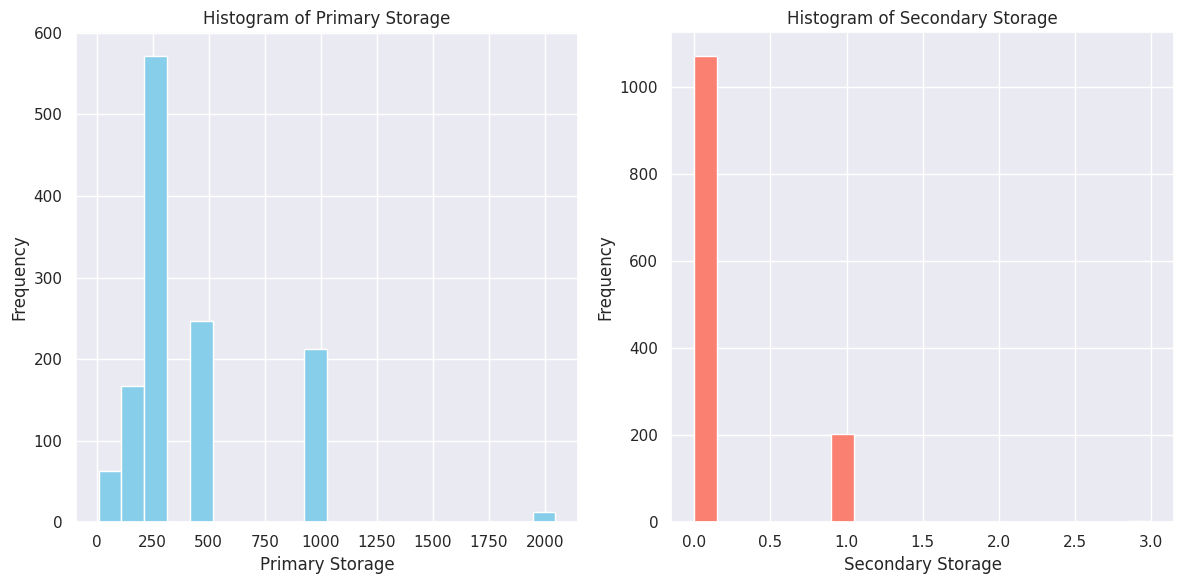

In [ ]:
# Histogram plotting of PrimaryStorage and SecondaryStorage

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_c['PrimaryStorage'], bins=20, color='skyblue')
plt.title('Histogram of Primary Storage')
plt.xlabel('Primary Storage')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_c['SecondaryStorageType'], bins=20, color='salmon')
plt.title('Histogram of Secondary Storage')
plt.xlabel('Secondary Storage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


This histogram displays the distribution of primary storage capacities in the dataset. The x-axis represents the primary storage capacity in gigabytes.The y-axis represents the frequency or the number of laptops that have that particular storage capacity. The histogram shows that the majority of laptops in the dataset have a primary storage capacity in the lower ranges (presumably between 0-256 GB, if it's SSD or HDD).A smaller number of laptops have storage capacities in the higher ranges (for example above 512GB).

This histogram visualizes the distribution of secondary storage types or capacities in the dataset. The x-axis represents the secondary storage type (e.g., HDD, SDD, Hybrid). The y-axis represents the frequency or count of laptops with a specific secondary storage type. The majority of laptops have no secondary storage or less frequency. A small number of laptops have HDD as secondary storage.

In [ ]:
# Drop the Price_Category (Target Variable) coloumn
X= df_c.drop('Price_Category',axis=1)
y= df_c['Price_Category']

In [ ]:
# Splitting into Train and Test Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

      Company  TypeName  Inches   Ram  OS  Weight  Price_euros  Screen  \
466       2.0         1    15.6   4.0   2    2.20       469.00     0.0   
501       1.0         1    15.6   8.0   2    1.91       618.99     0.0   
474       3.0         1    15.6  12.0   2    2.06      1299.00     3.0   
239       2.0         3    15.6   8.0   2    2.50       846.00     0.0   
1122      1.0         1    14.0   8.0   8    1.43      1513.00     0.0   
...       ...       ...     ...   ...  ..     ...          ...     ...   
763       3.0         0    13.3   8.0   2    1.20      1129.00     2.0   
835       4.0         3    15.6  16.0   2    3.21      2774.63     0.0   
1216      2.0         1    17.3   4.0   2    3.30       598.00     0.0   
559       4.0         1    15.6   4.0   2    2.18       617.90     0.0   
684       5.0         4    13.3   8.0   2    1.19      1499.00     0.0   

      ScreenW  ScreenH  Touchscreen  IPSpanel  RetinaDisplay  CPU_company  \
466    1366.0      768            

In [ ]:
# Fitting the dataset into Logistic Regression Model

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Output the learned coefficients of the model
print(reg.coef_)

print(reg.intercept_)

[[ 8.04663794e-03 -4.17000237e-01  2.17842278e+00 -1.94734300e-01
  -1.80470923e-01 -5.34807960e-01 -3.67871001e-02 -7.86365801e-01
  -9.68818126e-04  9.00160348e-03  1.31413547e-01 -2.55947540e-01
   4.17422806e-01  2.85436844e-03  2.37771077e-01  8.82276087e-06
  -4.43023021e-04 -1.14596314e-01 -1.52365776e-01 -1.48292925e+00]]
[0.42629999]


In [ ]:
# Predict the the y from the x
y_pred = reg.predict(X_test)
print(y_pred)

[1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1
 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0
 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1
 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1
 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1
 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0
 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0
 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1
 0 1 1 0 1 1 1 0 1 0 1 0 0]


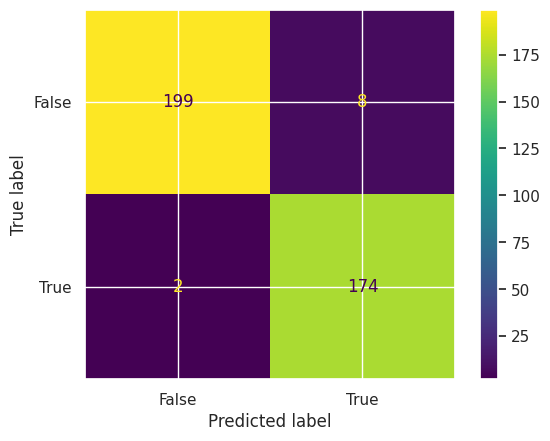

In [ ]:
# Confuison matrix for Employee dataset
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.9738903394255874
Precision: 0.9560439560439561
Recall (Sensitivity): 0.9886363636363636
F1-Score: 0.9720670391061452
